In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [11]:
# Параметри
num_samples = 1000
time_steps = 10
num_features = 3

In [12]:
# Генерація часового ряду
np.random.seed(0)
time = np.arange(num_samples)
data = np.zeros((num_samples, num_features))

for i in range(num_features):
    data[:, i] = np.sin(0.1 * time) + np.random.normal(scale=0.5, size=num_samples)


In [13]:
# Перетворення в DataFrame
df = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(num_features)])

# Збереження в CSV
df.to_csv('time_series_data.csv', index=False)


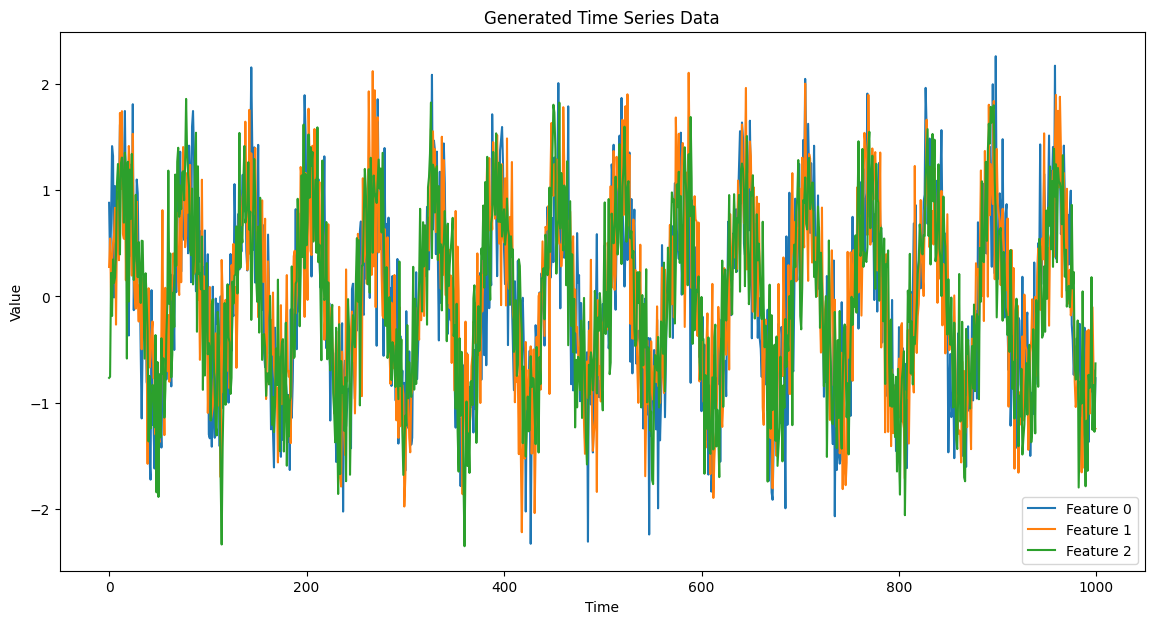

In [14]:
# Візуалізація
plt.figure(figsize=(14, 7))
for i in range(num_features):
    plt.plot(df.index, df[f'feature_{i}'], label=f'Feature {i}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated Time Series Data')
plt.legend()
plt.show()

In [15]:
# Загрузка даних
df = pd.read_csv('time_series_data.csv')
data = df.values

In [16]:
# Нормалізація
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [17]:
# Параметри для TimeseriesGenerator
num_samples = data_scaled.shape[0]
time_steps = 10
batch_size = 32
generator = TimeseriesGenerator(data_scaled, data_scaled, length=time_steps, batch_size=batch_size)


In [18]:
# Створення моделі
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, num_features)),
    Dense(num_features)
])
model.compile(optimizer='adam', loss='mse')


c:\Users\qizixxx\Documents\UNIC\2 course\dubov\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Тренування моделі
history = model.fit(generator, epochs=10, verbose=1)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2387
Epoch 2/10
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0465

c:\Users\qizixxx\Documents\UNIC\2 course\dubov\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0301
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0202
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0184
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169


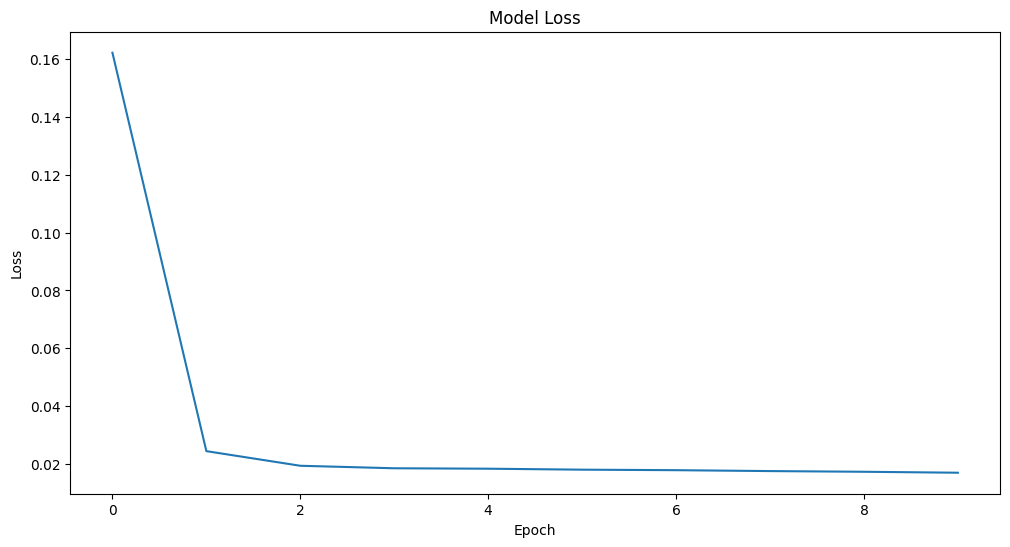

In [20]:
# Візуалізація втрат
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [21]:
# Прогнозування
predictions = model.predict(generator)
predictions = scaler.inverse_transform(predictions)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<Figure size 1400x700 with 0 Axes>

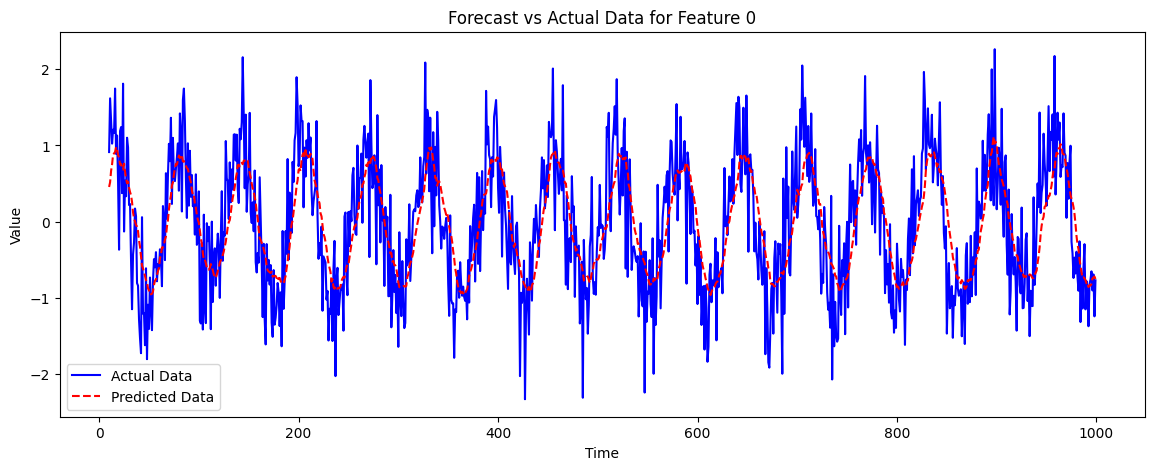

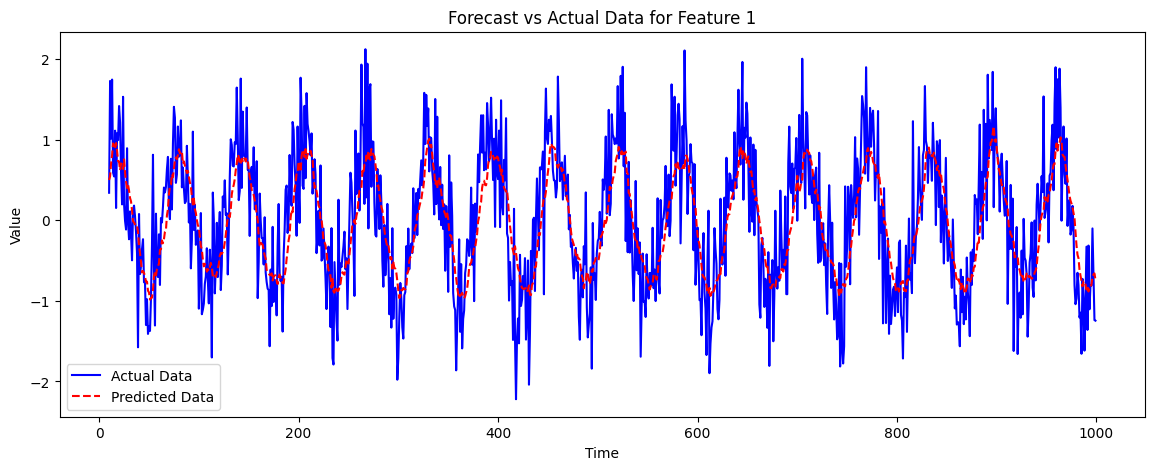

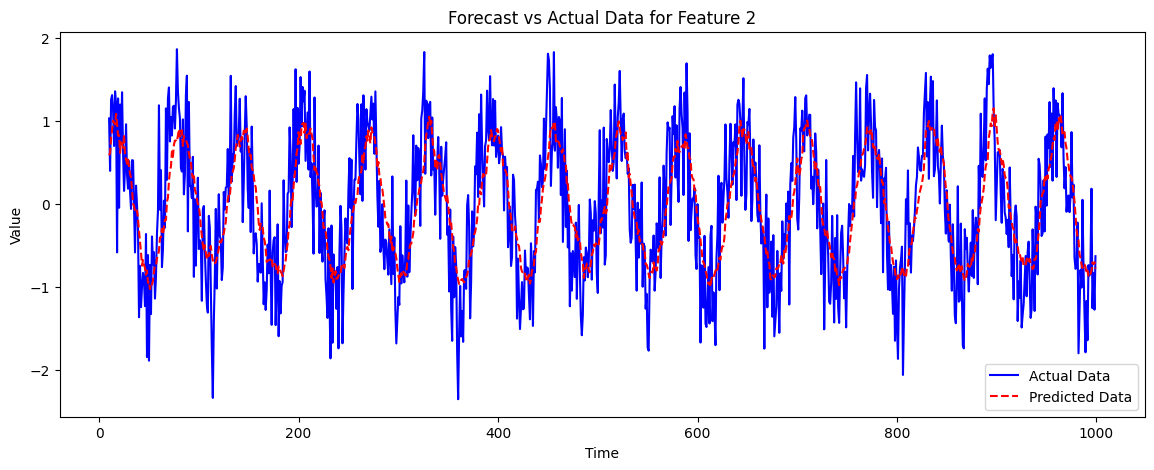

In [23]:
# Візуалізація прогнозів
plt.figure(figsize=(14, 7))
for i in range(num_features):
    plt.figure(figsize=(14, 5))
    plt.plot(df.index[time_steps:], df[f'feature_{i}'][time_steps:], label='Actual Data', color='blue')
    plt.plot(df.index[time_steps:], predictions[:, i], label='Predicted Data', linestyle='--', color='red')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Forecast vs Actual Data for Feature {i}')
    plt.legend()
    plt.show()